# Thesis graphics

Create graphics used in other parts of the thesis

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import os

GRAPHICS = 'graphics'

if not os.path.isdir(GRAPHICS):
    os.mkdir(GRAPHICS)

## SIR Phase plane

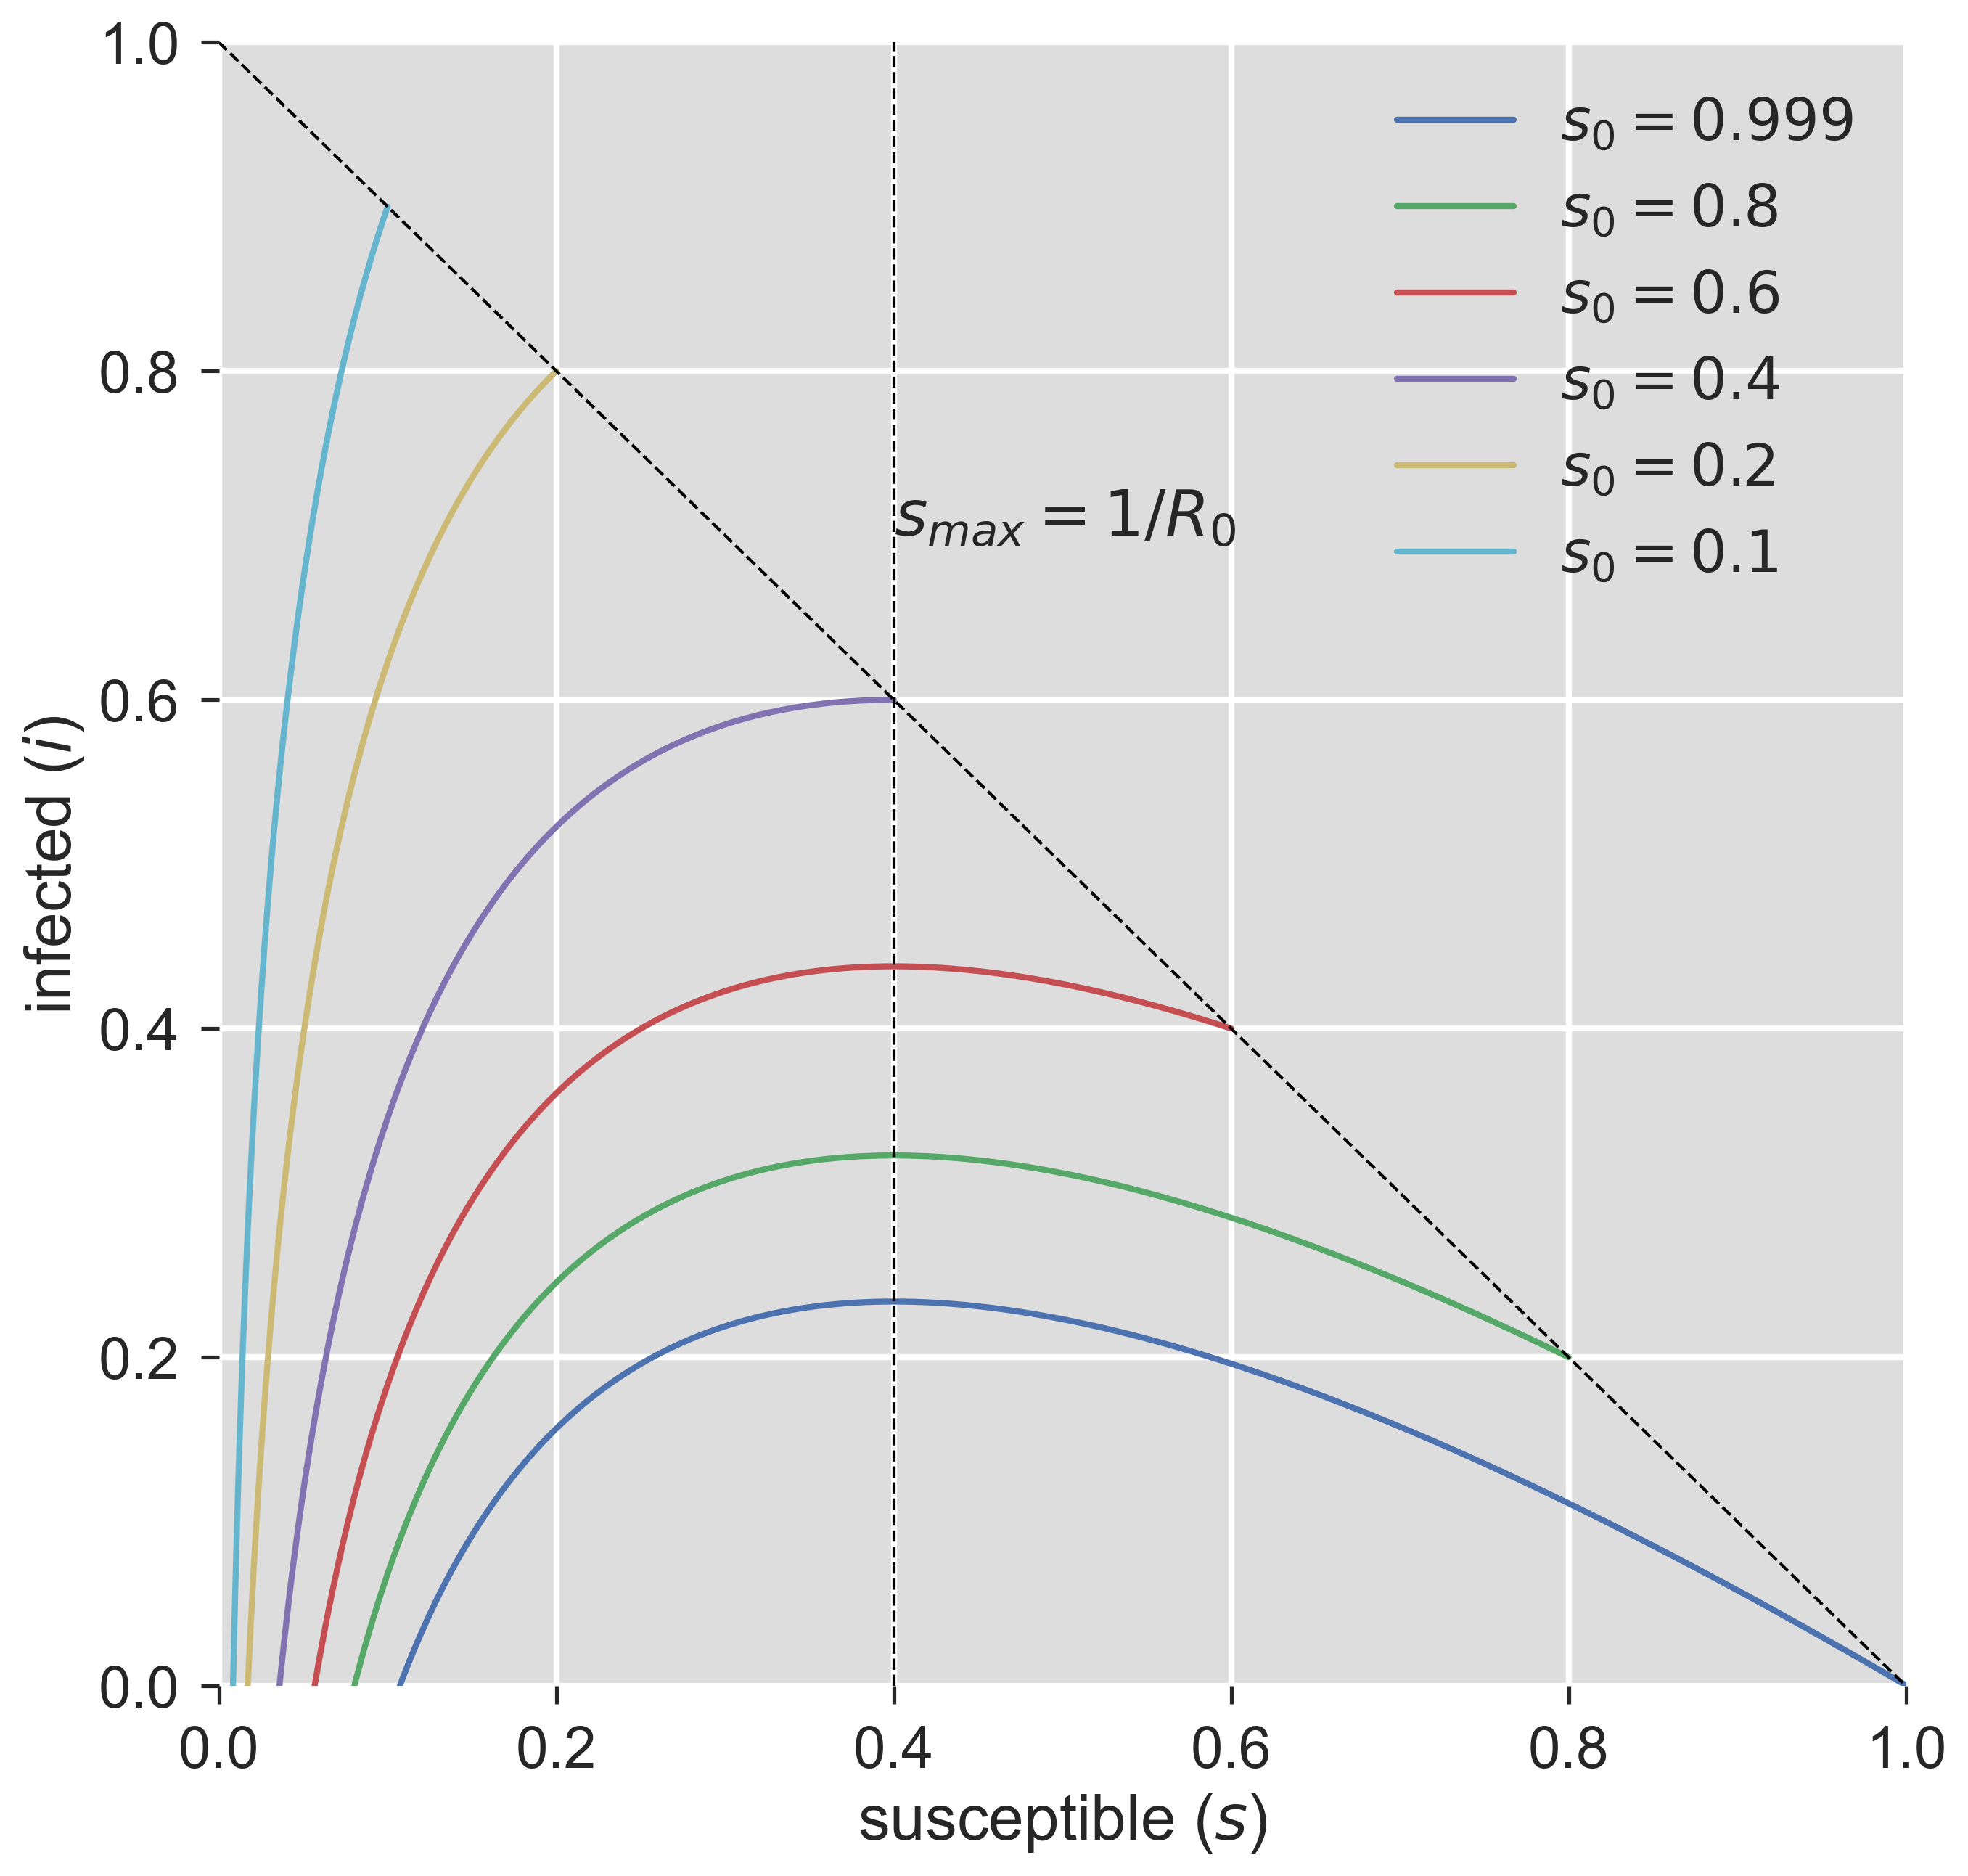

<Figure size 2400x1650 with 0 Axes>

In [2]:
matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.dpi'] = 300
seaborn.set_context('notebook', font_scale=1.75)

# Total population, N.
N = 1000

# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

# Contact rate, beta, and mean recovery rate, alpha, (in 1/days).
beta, alpha = 0.25, 1./10

sigma = beta/alpha

# Time steps
t = np.linspace(0, 150, 1000)

# The SIR model differential equations.
def deriv(y, t, N, beta, alpha):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - alpha * I
    dRdt = alpha * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, alpha))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)

fig = plt.figure(facecolor='w', figsize=[10, 10])
ax = fig.add_subplot(111, facecolor='#dddddd')

ics = [1, 200, 400, 600, 800, 900]

for i0 in ics:
    I0, R0 = i0, 0
    S0 = N - I0 - R0
    y0 = S0, I0, R0

    ret = odeint(deriv, y0, t, args=(N, beta, alpha))
    S, I, R = ret.T
    ax.plot(S / 1000, I / 1000, lw=2, label=f'$s_0={str(S0/1000)[:7]}$')

ax.plot([0, 1], [1, 0], 'k--', lw=1)
ax.plot([1/sigma, 1/sigma], [0, 1], 'k--', lw=1)
ax.text(1/sigma, 1-1/sigma+0.1, s='$s_{max}=1/R_0$')

ax.set_xlabel('susceptible ($s$)')
ax.set_ylabel('infected ($i$)')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


plt.show()
plt.savefig(GRAPHICS + '/sir-phase-plane.png')

## SIR epidemic curves with ODE

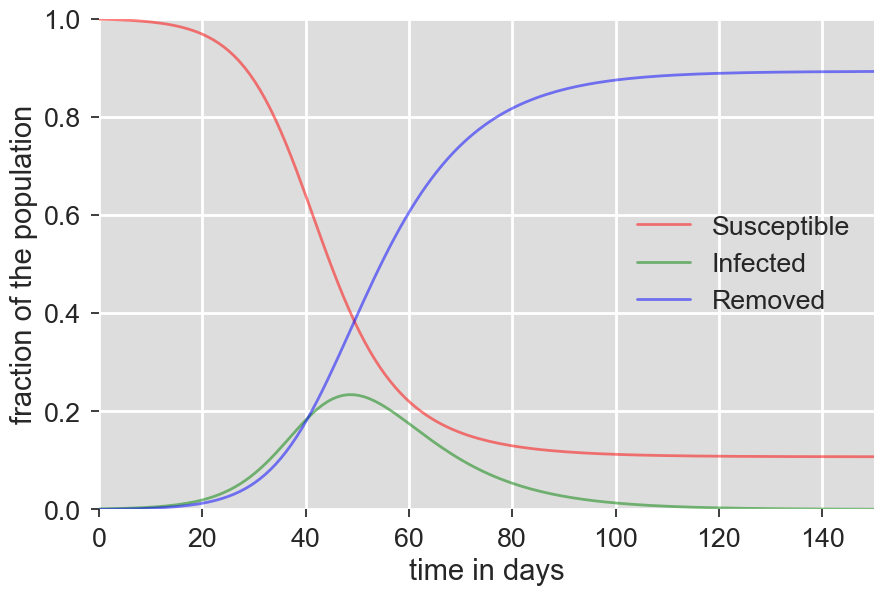

<Figure size 800x550 with 0 Axes>

In [3]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.25, 1./10

# A grid of time point s (in days)
t = np.linspace(0, 150, 150)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)

matplotlib.style.use('seaborn')
matplotlib.rcParams['figure.dpi'] = 100
seaborn.set_context('notebook', font_scale=1.75)

fig = plt.figure(facecolor='w', figsize=[10, 6.5])
ax = fig.add_subplot(111, facecolor='#dddddd')
ax.plot(t, S/1000, 'r', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'g', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'b', alpha=0.5, lw=2, label='Removed')
ax.set_xlabel('time in days')
ax.set_ylabel('fraction of the population')
ax.set_ylim(0, 1)
ax.set_xlim(0, 150)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

plt.show()
plt.savefig(GRAPHICS + '/sir-example.png')

## Graph examples

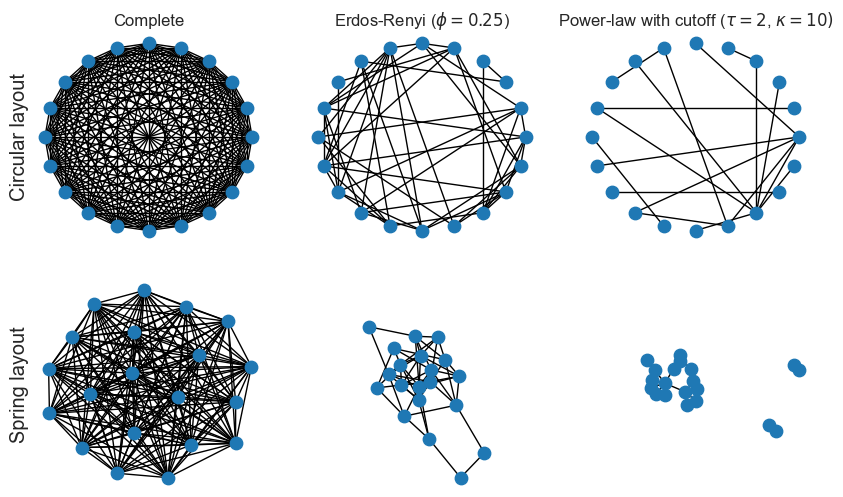

<Figure size 800x550 with 0 Axes>

In [6]:
import networkx as nx
import random
from epydemic.plc_generator import PLCNetwork
random.seed(100)

np.random.seed(100)

seaborn.set_context('notebook', font_scale=1)

def make_row_title_visible(ax):
    ax.axis('on')
    ax.set_frame_on(False)

    return ax


(fig, axs) = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))

N = 20
phi = 0.25
tau = 2
kappa = 10

graphs = []

params = dict()
params[PLCNetwork.N] = N
params[PLCNetwork.EXPONENT] = tau
params[PLCNetwork.CUTOFF] = kappa
plc = PLCNetwork(params=params)

graphs.append((nx.complete_graph(N), 'Complete'))
graphs.append((nx.erdos_renyi_graph(N, phi), rf'Erdos-Renyi ($\phi = {phi}$)'))
graphs.append((plc.generate(), rf'Power-law with cutoff ($\tau = {tau}$, $\kappa = {kappa})$'))

for i in range(len(graphs)):
    g = graphs[i]
    ax_top = axs[0][i]
    ax_bottom = axs[1][i]

    nx.draw_circular(g[0], ax=ax_top, node_size=80)
    ax_top.set_title(g[1])

    nx.draw_spring(g[0], ax=ax_bottom, node_size=80)

axs[0][0] = make_row_title_visible(axs[0][0])
axs[1][0] = make_row_title_visible(axs[1][0])

axs[0][0].set_ylabel('Circular layout', size='large')
axs[1][0].set_ylabel('Spring layout', size='large')

plt.show()
plt.savefig(GRAPHICS + '/graph-examples.png')